<a href="https://colab.research.google.com/github/irshad9873/sales_new_rossmann1/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Data Description**

**Rossmann Stores Data.csv** - historical data including Sales
**store.csv** - supplemental information about the stores

**Data fields**
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
[ ]


In [175]:
df_data=pd.read_csv("/content/Rossmann Stores Data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [176]:
df_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [177]:
df_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There is no null values in the data set


In [178]:
df_data.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6])

In [179]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [180]:
df_data['Year']=pd.DatetimeIndex(df_data['Date']).year
df_data['Month']=pd.DatetimeIndex(df_data['Date']).month
df_data['Day']=pd.DatetimeIndex(df_data['Date']).day

In [181]:
df_data.head()
df_data.drop('Date',inplace=True,axis=1)

In [182]:
df_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,5263,555,1,1,0,1,2015,7,31
1,2,5,6064,625,1,1,0,1,2015,7,31
2,3,5,8314,821,1,1,0,1,2015,7,31
3,4,5,13995,1498,1,1,0,1,2015,7,31
4,5,5,4822,559,1,1,0,1,2015,7,31


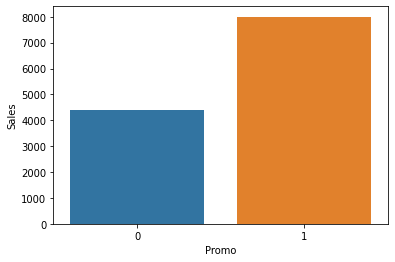

In [174]:
sns.barplot(x = 'Promo', y = 'Sales', data = df_data);

0= sales without promo, 
1=sales with promo 
, So here is clearly say that sales with promo is maximum


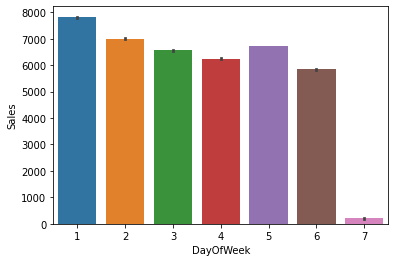

In [149]:
sns.barplot(x = 'DayOfWeek', y = 'Sales', data = df_data);

The sales is  vary with the days the maximum sales on Monday and minimum sales on the Sunday 

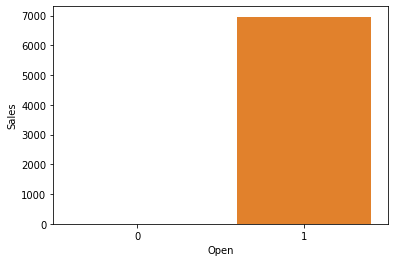

In [150]:
sns.barplot(x = 'Open', y = 'Sales', data = df_data);

0=store is closed , 1= store is open , so there  is no sales when store is closed

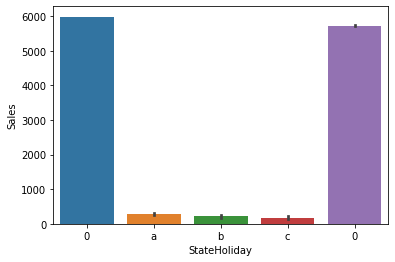

In [183]:
sns.barplot(x = 'StateHoliday', y = 'Sales',data = df_data);

a = public holiday, b = Easter holiday, c = Christmas, 0 = None
In this graphs we can easily seen that when store is open then sales reaches about 6000 and sales is minimum when holiday occur

In [152]:
df_data['SchoolHoliday'].unique()

array([1, 0])

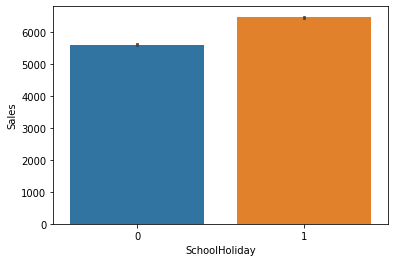

In [153]:

sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = df_data);

0 means no holyday , 1 means school holyday
so sales is maximum on the school holyday

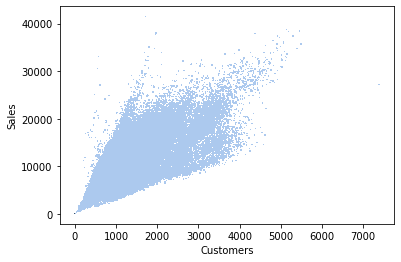

In [154]:
sns.histplot(x = 'Customers', y = 'Sales', data = df_data);

In this graph sales and customers are directly related to each other


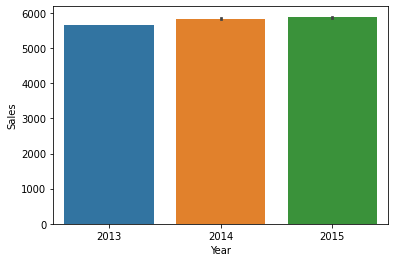

In [155]:
sns.barplot(x='Year',y='Sales',data=df_data);

sales will be slightly increase by the year 

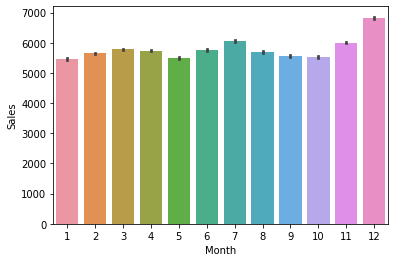

In [156]:
sns.barplot(x='Month',y='Sales',data=df_data);

In this graphs the sales on the month of december is maximum


In [157]:
df_data['Promo'].unique()

array([1, 0])

In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140326 entries, 0 to 140325
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          140326 non-null  int64  
 1   DayOfWeek      140326 non-null  int64  
 2   Sales          140326 non-null  int64  
 3   Customers      140326 non-null  int64  
 4   Open           140326 non-null  int64  
 5   Promo          140325 non-null  float64
 6   StateHoliday   140325 non-null  object 
 7   SchoolHoliday  140325 non-null  float64
 8   Year           140326 non-null  int64  
 9   Month          140326 non-null  int64  
 10  Day            140326 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 11.8+ MB


**Now install the store data**

In [94]:
store=pd.read_csv('/content/store.csv')

In [158]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270,9,2008,0,0,0,0
1,2,0,0,570,11,2007,1,13,2010,1
2,3,0,0,14130,12,2006,1,14,2011,1
3,4,2,2,620,9,2009,0,0,0,0
4,5,0,0,29910,4,2015,0,0,0,0


In [129]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Store                      1115 non-null   int64
 1   StoreType                  1115 non-null   int64
 2   Assortment                 1115 non-null   int64
 3   CompetitionDistance        1115 non-null   int64
 4   CompetitionOpenSinceMonth  1115 non-null   int64
 5   CompetitionOpenSinceYear   1115 non-null   int64
 6   Promo2                     1115 non-null   int64
 7   Promo2SinceWeek            1115 non-null   int64
 8   Promo2SinceYear            1115 non-null   int64
 9   PromoInterval              1115 non-null   int64
dtypes: int64(10)
memory usage: 87.2 KB


In [98]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [116]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

There is some null values in the data so we have to remove it first

In [115]:
store['CompetitionDistance']=store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean())
store['CompetitionOpenSinceMonth']=store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mean())
store['CompetitionOpenSinceYear']=store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mean())

Now the data is clean there is no null values present in the data 

In [110]:
store['PromoInterval'].unique()

array([0., 1., 2., 3.])

Convert the string into integer 


In [105]:
store['PromoInterval']=store['PromoInterval'].map({'nan':0,'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3})

Fill the null values in the data set 

In [108]:
store.update(store['Promo2SinceYear'].fillna(value=0,inplace=True))
store.update(store['PromoInterval'].fillna(value=0,inplace=True))
store.update(store['Promo2SinceWeek'].fillna(value=0,inplace=True))

Convert the type from object into int.

In [120]:
store['PromoInterval']=store['PromoInterval'].astype(int)
store['CompetitionDistance']=store['CompetitionDistance'].astype(int)
store['CompetitionOpenSinceMonth']=store['CompetitionOpenSinceMonth'].astype(int)
store['CompetitionOpenSinceYear']=store['CompetitionOpenSinceYear'].astype(int)
store['Promo2SinceWeek']=store['Promo2SinceWeek'].astype(int)
store['Promo2SinceYear']=store['Promo2SinceYear'].astype(int)

In [128]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270,9,2008,0,0,0,0
1,2,0,0,570,11,2007,1,13,2010,1
2,3,0,0,14130,12,2006,1,14,2011,1
3,4,2,2,620,9,2009,0,0,0,0
4,5,0,0,29910,4,2015,0,0,0,0


In [123]:
store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

Convert the assortment type 
a = basic, b = extra, c = extended
a=0, b=1, c=2

In [125]:
store['Assortment']=store['Assortment'].map({'a':0,'b':1,'c':2})

In [127]:
store['StoreType']=store['StoreType'].map({'a':0,'b':1,'c':2,'d':3})

Now its time to merge the both the data 

In [184]:
new_data=pd.merge(df_data,store,how='inner',on='Store')

In [205]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017209 non-null  int64
 1   DayOfWeek                  1017209 non-null  int64
 2   Sales                      1017209 non-null  int64
 3   Customers                  1017209 non-null  int64
 4   Open                       1017209 non-null  int64
 5   Promo                      1017209 non-null  int64
 6   StateHoliday               1017209 non-null  int64
 7   SchoolHoliday              1017209 non-null  int64
 8   Year                       1017209 non-null  int64
 9   Month                      1017209 non-null  int64
 10  Day                        1017209 non-null  int64
 11  StoreType                  1017209 non-null  int64
 12  Assortment                 1017209 non-null  int64
 13  CompetitionDistance        1017209 non-nul

In [202]:
new_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0.0,1,2015,7,31,2,0,1270,9,2008,0,0,0,0
1,1,4,5020,546,1,1,0.0,1,2015,7,30,2,0,1270,9,2008,0,0,0,0
2,1,3,4782,523,1,1,0.0,1,2015,7,29,2,0,1270,9,2008,0,0,0,0
3,1,2,5011,560,1,1,0.0,1,2015,7,28,2,0,1270,9,2008,0,0,0,0
4,1,1,6102,612,1,1,0.0,1,2015,7,27,2,0,1270,9,2008,0,0,0,0


In [208]:
new_data['Promo2SinceWeek'].unique()

array([ 0, 13, 14,  1, 45, 40, 26, 22,  5,  6, 10, 31, 37,  9, 39, 27, 18,
       35, 23, 48, 36, 50, 44, 49, 28])

In [196]:
new_data['StateHoliday']=new_data['StateHoliday'].map({'0':0,'a':1, 'b':2, 'c':3,})

In [201]:
new_data['StateHoliday']=new_data['StateHoliday'].fillna(0)

In [204]:
new_data['StateHoliday']=new_data['StateHoliday'].astype(int)

Now our data ready for the visualization 

In [206]:
new_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,31,2,0,1270,9,2008,0,0,0,0
1,1,4,5020,546,1,1,0,1,2015,7,30,2,0,1270,9,2008,0,0,0,0
2,1,3,4782,523,1,1,0,1,2015,7,29,2,0,1270,9,2008,0,0,0,0
3,1,2,5011,560,1,1,0,1,2015,7,28,2,0,1270,9,2008,0,0,0,0
4,1,1,6102,612,1,1,0,1,2015,7,27,2,0,1270,9,2008,0,0,0,0


In [211]:
new_data['Store']=new_data.groupby('Store')

ValueError: ignored